In [ ]:
# Required only to render Latex fonts for figures

# ! sudo apt-get install texlive-latex-recommended
# ! sudo apt install texlive-latex-extra
# ! sudo apt install dvipng
# ! apt install texlive-fonts-recommended texlive-fonts-extra cm-super dvipng

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import mode

In [ ]:
data_whole = pd.read_csv('/content/drive/My Drive/CSCW_H1/data/ST_labeled.csv')

In [ ]:
data_whole.date = pd.to_datetime(data_whole.date)

In [ ]:
data_whole = data_whole.sort_values('date')

In [ ]:
print(data_whole.date.iloc[0], data_whole.date.iloc[-1])

2016-09-30 10:28:00 2020-03-24 08:05:18


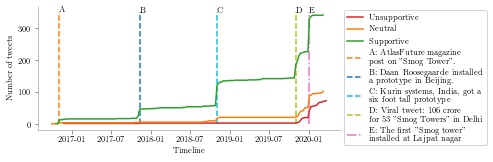

In [ ]:
#plt.figure(figsize=(15,8))
#plt.rc('font', size=20)
## Specify color scheme
def hexify(r,g,b,a):
    return '#'+hex(r)[2:]+hex(g)[2:]+hex(b)[2:]+hex(a)[2:]

my_clr   = {'l_b':hexify(147,205,221,255),
            'b':hexify(81,151,213,255),
            'eq':hexify(224,224,224,255),
            'y':hexify(253,215,42,255),
            'l_r':hexify(248,177,99,255)}
fig, ax = plt.subplots()
mapping = {0:'Unsupportive',1:'Neutral',2:'Supportive'}
color_map = ['tab:red','tab:orange','tab:green']
for label in [0,1,2]:
  df = data_whole[data_whole.Label==label][['Label','date']]
  df = df.set_index('date')
  df.Label = 1
  df = df.resample('7D').sum()
  ax.plot(df.index, df.Label.cumsum(), label=mapping[label], c=color_map[label])
low = 0
high = 350
ax.vlines(df.sort_values('Label', ascending=False).index[5],low,high,linestyles='dashed',
          color='tab:orange',
           label='A: AtlasFuture magazine \npost on "Smog Tower".')
ax.text(df.sort_values('Label', ascending=False).index[5],high,'A')
ax.vlines(df.sort_values('Label', ascending=False).index[3],low,high,linestyles='dashed',
          color='tab:blue',
           label='B: Daan Roosegaarde installed \na prototype in Beijing.')
ax.text(df.sort_values('Label', ascending=False).index[3],high,'B')
ax.vlines(df.sort_values('Label', ascending=False).index[1],low,high,linestyles='dashed',
           label='C: Kurin systems, India, got a \nsix foot tall prototype', color='tab:cyan')
ax.text(df.sort_values('Label', ascending=False).index[1],high,'C')
ax.vlines(df.sort_values('Label', ascending=False).index[2],low,high,linestyles='dashed',
           label='D: Viral tweet: 106 crore \nfor 53 "Smog Towers" in Delhi', color='tab:olive')
ax.text(df.sort_values('Label', ascending=False).index[2],high,'D')
ax.vlines(df.sort_values('Label', ascending=False).index[0],low,high,linestyles='dashdot',
           label='E: The first "Smog tower" \ninstalled at Lajpat nagar', color='tab:pink')
ax.text(df.sort_values('Label', ascending=False).index[0],high,'E')
ax.legend(bbox_to_anchor=[1,1]);
ax.set_xlabel('Timeline')
ax.set_ylabel('Number of tweets');
plt.tight_layout()
plt.savefig('SmogTower-Updates.pdf')